In [771]:
import pandas as pd
df = pd.read_csv('train.csv')

### 2. Get data

In [772]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [773]:
# fill na with column mean
#df_age = pd.DataFrame(df_sub['Age'].fillna(df_sub['Age'].mean()))
        
# fill na with column median
#df_age = pd.DataFrame(df_sub['Age'].fillna(df_sub['Age'].median())) 

# # fill based on survived or not survived condition
# import numpy as np
# import random
# df['Age'] = np.where(((df['Survived'] == 1) & (df['Age'].isna())), df['Age'], random.randint(20,40))
# df['Age'] = np.where(((df['Survived'] == 0) & (df['Age'].isna())), df['Age'], random.randint(0,20)|random.randint(40,80))

# df.isnull().sum().sort_values(ascending = False)

### 3. Train-Test-Split

In [774]:
X = df.drop('Survived', axis=1)
type(X) # feature matrix

pandas.core.frame.DataFrame

In [775]:
y = df['Survived']
type(y) # series 

pandas.core.series.Series

In [776]:
from sklearn.model_selection import train_test_split

In [777]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [778]:
X_train.shape, y_train.shape

((712, 11), (712,))

In [779]:
X_test.shape, y_train.shape

((179, 11), (712,))

### 4. Explore data

#### 4.1 get an overview

In [780]:
print(
      '\n\n info\n', df.info(),
     '\n\nsummary stats\n', df.describe(),
     '\n\nmedian\n', df.median()
)

# df.shape and df.count() , df.std(), df.mean() etc. included

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 info
 None 

summary stats
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std

#### 4.1 explore missing value counts

In [781]:
# check where missing values are
df.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

#### 4.2 check value counts for certain columns

In [782]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

#### 4.3. check for correlations

In [783]:
# for all columns with numerical values
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [784]:
# for columns that make sense to use as feature input for the model 

#sub_df = df[['Survived', 'Pclass', 'Age', 'Sex']]
sub_df = df.loc[:,('Survived', 'Pclass', 'Age', 'Sex')]

# turn sex values into numerical
sub_df.replace({'Sex': {'male': 1, 'female':0 }}, inplace=True)
sub_df.corr()
# try pclass and age as interaction term

,Survived,Pclass,Age,Sex
Survived,1.000000,-0.338481,-0.077221,-0.543351
Pclass,-0.338481,1.000000,-0.369226,0.131900
Age,-0.077221,-0.369226,1.000000,0.093254
Sex,-0.543351,0.131900,0.093254,1.000000


#### 4.1 plots

### 5. Feature Engineering

#### 5.2 Imputation age column

In [785]:
## see in df above

#### 5.4 Function

In [805]:
def feature_engineer(df): # take any dataframe, no matter if test or train
        # select relevant features
        df_sub = df[['Age', 'Pclass', 'Sex']] 
        
        # make Sex numerical and put it into two columns 
        sex_binary_df = pd.get_dummies(df_sub['Sex'], drop_first=True)        
        
        # one hot-encoding of passenger class
        pclass_binary_df = pd.get_dummies(df_sub['Pclass'], prefix='Pclass')
        pclass_binary_df = pclass_binary_df.drop('Pclass_3', axis=1)
        
        # join with the age column
        df_age = pd.DataFrame(df_sub['Age'].fillna(df_sub['Age'].mean()))
        df_fe = pd.DataFrame(df_age.join([sex_binary_df, pclass_binary_df], how='left'))
        
        # add interaction term (Pclass and Age)
        # df_fe['Pclass_1_Age_interact'] = df_fe['Pclass_1'] * df_fe['Age']
        # df_fe['Pclass_2_Age_interact'] = df_fe['Pclass_2'] * df_fe['Age']
        # not used -> only increases training acc. in rf, but decreases test acc. 
        
        # add interaction term (Pclass and Sex)
        df_fe['Pclass_1_sex_interact'] = df_fe['Pclass_1'] * df_fe['male']
        df_fe['Pclass_2_sex_interact'] = df_fe['Pclass_2'] * df_fe['male']
        # -> improves the test accuracy for linear regression!
        
        return df_fe

In [806]:
X_train_fe = feature_engineer(X_train)
X_train_fe.head(70)

,Age,male,Pclass_1,Pclass_2,Pclass_1_sex_interact,Pclass_2_sex_interact
331,45.500000,1,1,0,1,0
733,23.000000,1,0,1,0,1
382,32.000000,1,0,0,0,0
704,26.000000,1,0,0,0,0
813,6.000000,0,0,0,0,0
...,...,...,...,...,...,...
843,34.500000,1,0,0,0,0
355,28.000000,1,0,0,0,0
464,29.498846,1,0,0,0,0
753,23.000000,1,0,0,0,0


#### 5.2 Scaling

In [808]:
# scaling with min max
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_fe) # memorizes the min and max for each column, no y 
X_train_fe_scaled_m = scaler.transform(X_train_fe) # does the actual scaling; still no y
X_train_fe_scaled_m  # numpy array

array([[0.56647399, 1.        , 1.        , 0.        , 1.        ,
        0.        ],
       [0.28373963, 1.        , 0.        , 1.        , 0.        ,
        1.        ],
       [0.39683338, 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       ...,
       [0.50992712, 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.17064589, 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.25860769, 1.        , 1.        , 0.        , 1.        ,
        0.        ]])

In [809]:
# scaling with standard scaler
from sklearn.preprocessing import StandardScaler
m = StandardScaler()
X_train_fe_scaled_std = m.fit_transform(X_train_fe)
X_train_fe_scaled_std

array([[ 1.2322632 ,  0.7243102 ,  1.8352379 , -0.51880845,  2.57990581,
        -0.38280262],
       [-0.50048197,  0.7243102 , -0.54488848,  1.92749365, -0.38761105,
         2.61231235],
       [ 0.1926161 ,  0.7243102 , -0.54488848, -0.51880845, -0.38761105,
        -0.38280262],
       ...,
       [ 0.88571416,  0.7243102 , -0.54488848, -0.51880845, -0.38761105,
        -0.38280262],
       [-1.19358003, -1.38062393,  1.8352379 , -0.51880845, -0.38761105,
        -0.38280262],
       [-0.65450376,  0.7243102 ,  1.8352379 , -0.51880845,  2.57990581,
        -0.38280262]])

### 6. Train Model

In [810]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [811]:
# Logistic Regression
m_1 = LogisticRegression() # inverse of the regularization strength C=1

# Random Forest
m_2 = DecisionTreeClassifier(max_depth=4, random_state=14)

In [812]:
m_1.fit(X_train_fe, y_train)
m_2.fit(X_train_fe, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=14, splitter='best')

In [813]:
# training accuracy for Logistic Regression
m_1.score(X_train_fe, y_train) 
# training acc history: 
# predictors Sex and Pclass: 0.787
# next including age:        0.79775
# with binning of age column into 8 bins 0.796 -> detailled age information is needed
# with minmax scaling        0.790
# with standard scaler:      0.794 
acc = m_1.score(X_train_fe, y_train)  # calculates an accuracy
print(f"{acc.round(3) * 100}% accuracy")

78.9% accuracy


In [814]:
# inspect coefficients and intercept
print(m_1.coef_ , m_1.intercept_)

[[-0.02507221 -1.90537763  2.46686104  2.20984975 -0.9523858  -1.7979463 ]] [0.73863743]


In [815]:
# calculate probabilities
m_1.predict_proba(X_train_fe[:5])

array([[0.68848594, 0.31151406],
       [0.79108824, 0.20891176],
       [0.87750913, 0.12249087],
       [0.86040017, 0.13959983],
       [0.357047  , 0.642953  ]])

In [816]:
# Random Forest training accuracy
m_2.score(X_train_fe, y_train) 

# max_depth = 2 : 0.799 ->  0.002 better than logistic regression! 
# max_depth = 4:  0.813
# max_depth = 10:  0.863
# no hyperparameters set: 0.877 overfitted?
# with interaction term age-pclass: 0.817
# with interaction term sex-pclass: 0.813

0.8132022471910112

### 7. Optimize/ Cross-Validation

### 8. Calculate Test Score

In [817]:
# run feature engineering on test data
X_test_fe = feature_engineer(X_test)

In [818]:
# optinal scaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_test_fe) # memorizes the min and max for each column, no y 
X_test_fe_scaled_m = scaler.transform(X_test_fe)


In [819]:
# run test score function
# Logistic Regression
m_1.score(X_test_fe, y_test)

# test score history:
# 0.793 with minmax scaling
# 0.804 without any scaling 
# 0.821 with interaction term sex-pclass

0.8044692737430168

In [820]:
# Random Forest
m_2.score(X_test_fe, y_test)
# max depth = 6: 0.759
# max depth = 2: 0.782
# max depth = 4: 0.810
# with interaction term age-pclass: 0.804 only increases acc in the training set 
# with interaction term sex-pclass: 0.810

0.8100558659217877

### Plot decision tree

[Text(446.4, 587.0880000000001, 'male <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]\nclass = Dead'),
 Text(241.79999999999998, 456.624, 'Pclass_1 <= 0.5\ngini = 0.386\nsamples = 245\nvalue = [64, 181]\nclass = Survived'),
 Text(148.79999999999998, 326.1600000000001, 'Pclass_2 <= 0.5\ngini = 0.454\nsamples = 175\nvalue = [61, 114]\nclass = Survived'),
 Text(74.39999999999999, 195.69600000000003, 'Age <= 36.5\ngini = 0.5\nsamples = 115\nvalue = [59, 56]\nclass = Dead'),
 Text(37.199999999999996, 65.23200000000008, 'gini = 0.499\nsamples = 106\nvalue = [51, 55]\nclass = Survived'),
 Text(111.6, 65.23200000000008, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]\nclass = Dead'),
 Text(223.2, 195.69600000000003, 'Age <= 27.5\ngini = 0.064\nsamples = 60\nvalue = [2, 58]\nclass = Survived'),
 Text(185.99999999999997, 65.23200000000008, 'gini = 0.137\nsamples = 27\nvalue = [2, 25]\nclass = Survived'),
 Text(260.4, 65.23200000000008, 'gini = 0.0\nsamples = 33\nvalue = [0, 33]\nclass = Survi

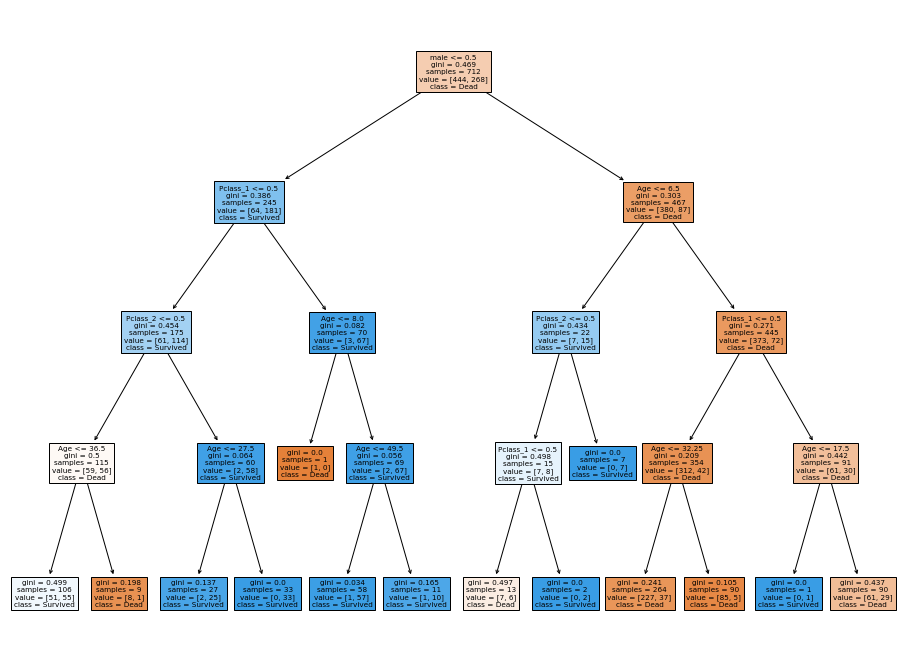

In [821]:
from matplotlib import pyplot as plt
plt.figure(figsize=(16, 12))
plot_tree(m_2, feature_names = ["Age", "male", "Pclass_1", "Pclass_2"], class_names=["Dead", "Survived"], filled=True)

### Submit it to Kaggle 

### Save the model

In [822]:
import pickle
pickle.dump(m, open('titanic_random_forest_model.m', 'wb'))  # <-- saves model to a binary file

### Load the model

In [580]:
m3 = pickle.load(open('titanic_random_forest_model.m', 'rb'))